# ChurnSage: Customer Retention Intelligence

Customer churn is one of the biggest challenges faced by businesses today. Losing customers directly impacts revenue and long-term growth. This project leverages data-driven insights and machine learning to predict and prevent customer churn effectively.

With ChurnSage, we aim to uncover patterns that signal churn and empower businesses to take strategic actions for improved customer retention.


## 2. Business Understanding

Customer churn — the process where customers discontinue using a company's product or service — presents a significant challenge for businesses, especially in competitive and subscription-based industries. It not only impacts revenue, but also increases the cost of customer acquisition and reduces long-term profitability.

In this project, I aim to build a data-driven framework that enables early identification of customers likely to churn. My goal is to empower decision-makers with predictive insights that inform timely interventions, customer retention strategies, and improved service personalization.

### Problem Statement
Many businesses lack the analytical infrastructure to anticipate churn before it happens. Without accurate forecasting, retention efforts are reactive rather than proactive. This leads to avoidable customer losses and missed opportunities for engagement.

### Project Objectives
Through this analysis and modeling process, I aim to:

- Identify key patterns and factors that influence customer churn.
- Develop a predictive machine learning model capable of flagging high-risk customers.
- Translate model outcomes into actionable recommendations for business teams.
- Demonstrate end-to-end capability in solving a real-world business problem using data science.

### Key Business Questions
This project aims to answer the following critical questions:

- What behavioral, demographic, or transactional factors contribute to customer churn?
- Can I develop a reliable machine learning model to predict churn before it happens?
- What strategies or business actions can be informed by these predictive insights?

By the end of this project, I intend to showcase a complete workflow — from problem understanding to deployment-ready solutions — while aligning technical outputs with strategic business goals.


## 3. Data Understanding

In this section, I begin by loading the dataset and conducting an initial exploration to understand its structure, data types, and general characteristics.

This step is critical for identifying potential issues such as missing values, data imbalances, or irregularities that may affect model performance later.

The dataset used in this project is a publicly available churn dataset from [BigML](https://bigml.com), which simulates customer data for a telecom company.

The dataset is stored in the `data/` folder and consists of behavioral and demographic attributes such as `account length`, `voice mail plan`, `international plan`, `customer service calls`, and whether or not the customer has churned.


### Load and Preview the Data

In [1]:
# Import essential libraries
import pandas as pd

# Load the dataset
file_path = '../data/bigml_59c28831336c6604c800002a.csv'
df = pd.read_csv(file_path)

# Preview the first 5 rows
df.head()


,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,...,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [3]:
df.info

<bound method DataFrame.info of      state  account length  area code phone number international plan  \
0       KS             128        415     382-4657                 no   
1       OH             107        415     371-7191                 no   
2       NJ             137        415     358-1921                 no   
3       OH              84        408     375-9999                yes   
4       OK              75        415     330-6626                yes   
...    ...             ...        ...          ...                ...   
3328    AZ             192        415     414-4276                 no   
3329    WV              68        415     370-3271                 no   
3330    RI              28        510     328-8230                 no   
3331    CT             184        510     364-6381                yes   
3332    TN              74        415     400-4344                 no   

     voice mail plan  number vmail messages  total day minutes  \
0                yes     

## 4. Data Preparation

Before conducting exploratory analysis and building predictive models, it is important to ensure the dataset is clean, consistent, and in a usable format.

In this section, I aim to:

- Check for and handle missing or inconsistent data.
- Convert data types where necessary.
- Encode categorical variables appropriately.
- Perform any basic feature engineering or transformations required for modeling.


## 4.1 Check for Missing Values

In [10]:
# Check for missing values in each column
missing = df.isnull().sum()
missing = missing[missing > 0]

if missing.empty:
    print("✅ No missing values found in the dataset.")
else:
    print("⚠️ Missing values detected:\n", missing)

✅ No missing values found in the dataset.


## 4.2 Check and Fix Data Types 

In [13]:
# 4.2 Check and Fix Data Types
# Display data types of all columns
df.dtypes


state                      object
account length              int64
area code                   int64
international plan         object
voice mail plan            object
number vmail messages       int64
total day minutes         float64
total day calls             int64
total day charge          float64
total eve minutes         float64
total eve calls             int64
total eve charge          float64
total night minutes       float64
total night calls           int64
total night charge        float64
total intl minutes        float64
total intl calls            int64
total intl charge         float64
customer service calls      int64
churn                        bool
dtype: object

## 4.3 Identify Categorical Columns

In [14]:
# 4.3 Identify Categorical Columns
# List of categorical variables
categorical_cols = df.select_dtypes(include='object').columns.tolist()
print("Categorical Columns:", categorical_cols)


Categorical Columns: ['state', 'international plan', 'voice mail plan']


## 4.4 Encode Categorical Columns

In [15]:
# 4.4 Encode Categorical Columns using one-hot encoding
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded.head()


,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,...,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,international plan_yes,voice mail plan_yes
0,128,415,25,265.1,110,45.07,197.4,99,16.78,244.7,...,0,0,0,0,0,0,0,0,0,1
1,107,415,26,161.6,123,27.47,195.5,103,16.62,254.4,...,0,0,0,0,0,0,0,0,0,1
2,137,415,0,243.4,114,41.38,121.2,110,10.30,162.6,...,0,0,0,0,0,0,0,0,0,0
3,84,408,0,299.4,71,50.90,61.9,88,5.26,196.9,...,0,0,0,0,0,0,0,0,1,0
4,75,415,0,166.7,113,28.34,148.3,122,12.61,186.9,...,0,0,0,0,0,0,0,0,1,0


## 4.5 Confirm Final Dataset

In [16]:
# Check shape and structure of cleaned data
df_encoded.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 69 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   account length          3333 non-null   int64  
 1   area code               3333 non-null   int64  
 2   number vmail messages   3333 non-null   int64  
 3   total day minutes       3333 non-null   float64
 4   total day calls         3333 non-null   int64  
 5   total day charge        3333 non-null   float64
 6   total eve minutes       3333 non-null   float64
 7   total eve calls         3333 non-null   int64  
 8   total eve charge        3333 non-null   float64
 9   total night minutes     3333 non-null   float64
 10  total night calls       3333 non-null   int64  
 11  total night charge      3333 non-null   float64
 12  total intl minutes      3333 non-null   float64
 13  total intl calls        3333 non-null   int64  
 14  total intl charge       3333 non-null   

##  EDA and Statistics
**We want to uncover patterns, trends, and relationships to better understand customer churn. Some guiding questions:**

- 1.Which features are most associated with churn?

- 2.Do customers with international plans churn more?

- 3.Does the number of customer service calls relate to churn?

- 4.How does usage (minutes, charges) differ between churners and non-churners?

- 5.Are there any standout states with higher churn rates?

### Importing Libraries

In [17]:
# 5.0 Import necessary libraries for EDA
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Set default theme for seaborn
sns.set(style="whitegrid")


### 5.1 Churn Distribution

Before analyzing features in relation to churn, let's understand the overall distribution of churned vs non-churned customers. This tells us whether we’re dealing with class imbalance.


📊 Churn Rate: 14.49%


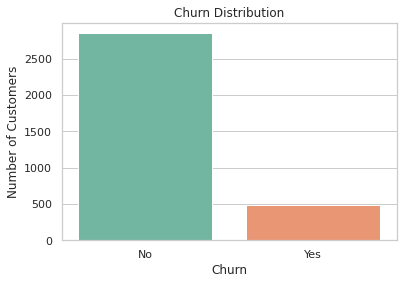

In [18]:
# Plot churn distribution
plt.figure(figsize=(6, 4))
sns.countplot(x='churn', data=df, palette='Set2')
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Number of Customers")
plt.xticks([0, 1], ['No', 'Yes'])

# Show churn rate
churn_rate = df['churn'].mean()
print(f"📊 Churn Rate: {churn_rate:.2%}")
plt.show()


### 5.1 Churn Distribution – Interpretation

The bar chart above visualizes the distribution of customers who have churned (left the service) versus those who have remained subscribed.

#### Key Observations

- **Most customers did not churn**  
  The chart shows that a large majority of the customers fall under the "No" category, meaning they did not leave the company. This is represented by the much taller bar on the left.

- **Only a small portion churned**  
  A significantly smaller number of customers fall under the "Yes" category. These are the customers who have churned and are represented by the shorter bar on the right.

#### Why This Matters

- **Class Imbalance**  
  This imbalance between churned and non-churned customers is critical to highlight. When training machine learning models, class imbalance can lead to a situation where the model favors the majority class ("No churn") and performs poorly at detecting churned customers. This will need to be addressed later in the modeling phase through techniques such as resampling or adjusting class weights.

- **Business Implications**  
  While the proportion of churned customers appears relatively small, each lost customer can represent a financial loss and potential dissatisfaction with the service. Understanding the causes of churn is essential to improving customer satisfaction and long-term retention.

#### Next Steps

In the next steps, I will explore how different variables (such as international plan, customer service calls, and usage behavior) relate to churn. This will help build a foundation for predictive modeling and inform actionable business strategies to reduce churn.


### 5.2 Churn Rate by International Plan

**Goal:**  
Explore whether customers who have subscribed to the **International Plan** are more likely to churn than those who haven’t.

To analyze this, I will:

- Group the dataset by `international plan` and `churn` status.
- Count the number of customers in each group.
- Normalize the values to show proportions.
- Visualize the results in a stacked bar chart to compare churn behavior for customers **with** and **without** an international plan.


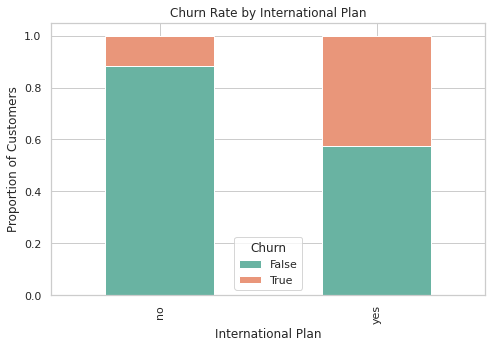

In [19]:
# 5.2 Churn Rate by International Plan
int_plan_churn = df.groupby(['international plan', 'churn']).size().unstack()

# Normalize by row to get percentages
int_plan_churn_percent = int_plan_churn.div(int_plan_churn.sum(axis=1), axis=0)

# Plot
int_plan_churn_percent.plot(kind='bar', stacked=True, figsize=(7,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by International Plan")
plt.xlabel("International Plan")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()

### 5.2 Churn Rate by International Plan - Interpretation

This bar chart compares the proportion of customers who churned based on whether they were subscribed to the **International Plan**.

**Key Insights:**

- **Customers without an International Plan (left bar)**: The vast majority did **not churn**. A very small portion of this group ended their service.
- **Customers with an International Plan (right bar)**: A **much higher proportion churned** compared to those without the plan.

**Conclusion:**

Having an International Plan appears to be **strongly associated with a higher likelihood of churn**. This could suggest that customers using international services are less satisfied or have higher expectations that aren't being met.

This is an important signal for the business—it may be worth investigating the International Plan’s pricing, service quality, or customer support experience.


## 5.3 Customer Service Calls and Churn

**Objective:** Investigate whether the number of calls a customer makes to customer service is related to their likelihood of churning.

To do this, we will:

- Group customers based on the number of customer service calls.
- Calculate the churn rate for each group.
- Visualize the relationship between customer service interactions and churn behavior.

This will help us determine if frequent customer service interactions are a warning sign of dissatisfaction leading to churn.


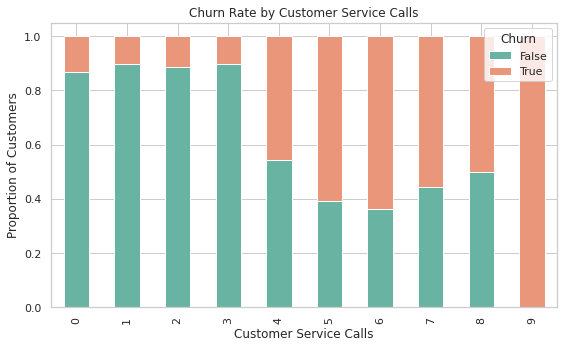

In [20]:
# Group data by number of customer service calls and churn
cs_calls_churn = df.groupby(['customer service calls', 'churn']).size().unstack()

# Normalize to get proportions
cs_calls_churn_percent = cs_calls_churn.div(cs_calls_churn.sum(axis=1), axis=0)

# Plot
cs_calls_churn_percent.plot(kind='bar', stacked=True, figsize=(8,5), color=['#69b3a2', '#e9967a'])
plt.title("Churn Rate by Customer Service Calls")
plt.xlabel("Customer Service Calls")
plt.ylabel("Proportion of Customers")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


## 5.3 Interpretation: Churn Rate by Customer Service Calls

This stacked bar chart shows how the likelihood of a customer churning varies depending on the number of times they contacted customer service.

### Key Observations

- **Low Churn with Few Calls:**  
  Customers who made **0 to 3 customer service calls** have a **very low churn rate**. Most of them are retained (green portion), indicating satisfaction or fewer issues.

- **Churn Rises After 3 Calls:**  
  Starting from **4 calls and above**, the churn rate begins to increase significantly.  
  By **5 or more calls**, more customers are churning (orange portion becomes dominant).

- **High Churn Beyond 5 Calls:**  
  At **6 or more calls**, the churn rate is very high — in some cases, **more than half** of the customers who contacted support this many times ended up churning.

### Interpretation

This trend strongly suggests a **relationship between customer dissatisfaction and churn**:
- Frequent contact with customer service likely signals unresolved problems or frustration.
- When issues aren't resolved promptly or effectively, customers are more likely to leave.

### Implication for the Business

- The company should **analyze customer service interactions closely**, especially for those who call multiple times.
- Taking **proactive steps** to resolve issues quickly for customers who call **more than 3 times** might significantly reduce churn.


## 5.4 Churn vs Total Day Minutes

### Objective:
Determine if higher usage during the day (in terms of total minutes) has any relation to customer churn.


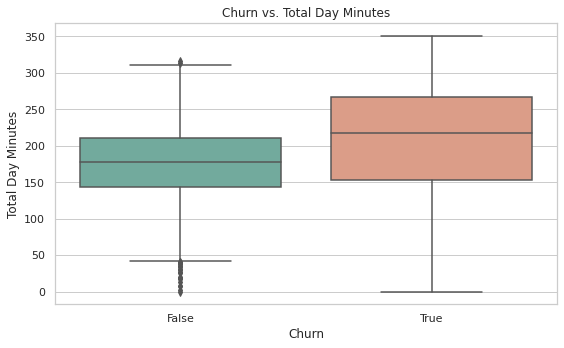

In [21]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total day minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Day Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Day Minutes')
plt.tight_layout()
plt.show()

## Interpretation: Churn vs Total Day Minutes

This boxplot compares the distribution of total day minutes used by customers who churned versus those who did not.

###  Key Observations

- **Higher Usage Among Churned Customers**:
  - Customers who churned tend to have higher total day minutes compared to those who stayed.
  - The median (middle line in the box) for churned customers is visibly higher.

- **Wider Spread in Churned Group**:
  - The churned group shows more variability, with some customers using significantly more minutes than the average.

- **Potential Outliers**:
  - There are a few extreme outliers among the churned group, indicating very high usage for a small subset of customers.

###  Interpretation

This pattern suggests a correlation between **higher daytime usage** and **likelihood of churn**:

- Heavy users may have **higher expectations** or are more likely to experience **network or billing issues**, leading to dissatisfaction.
- Alternatively, the pricing model might not favor high-usage customers, prompting them to switch providers.

###  Implication for the Business

- Analyze the experience of high-usage customers — Are they facing service degradation? Are they unhappy with pricing?
- Consider **loyalty programs or better plans** for heavy users to prevent them from churning.
- Use this insight to **segment customers by usage** and apply **targeted retention strategies**.


## 5.5 Churn vs Total Night Minutes

### Objective:
Evaluate whether there’s any noticeable relationship between night-time call minutes and customer churn.

To assess this, we will:

- Visualize the distribution of total night minutes for churned vs non-churned customers using a boxplot.
- Examine whether customers who churned tend to have higher or lower night-time call durations.
- Analyze any observable patterns that could guide business strategy for retention.


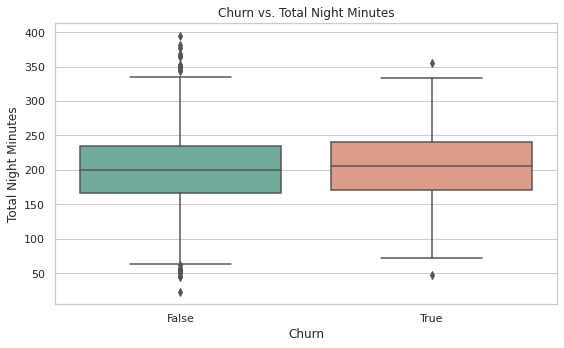

In [22]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total night minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')
plt.tight_layout()
plt.show()


##  Churn vs. Total Night Minutes (Boxplot Interpretation)

This boxplot compares the distribution of **Total Night Minutes** between customers who **churned** (`True`) and those who **did not churn** (`False`).

### Boxplot Summary

| Metric                  | Churn = False     | Churn = True      |
|-------------------------|-------------------|--------------------|
| **Median**              | ~200 minutes      | ~210 minutes       |
| **IQR (Spread)**        | Wider             | Narrower           |
| **Range**               | ~30 to ~340+ mins | ~45 to ~340+ mins  |
| **Outliers**            | Many high outliers| Fewer, but present |
| **Symmetry**            | Slight skew       | Fairly symmetric   |

###  Key Insights

-  **Higher Median for Churners**: Customers who churned had a slightly **higher median night usage**, suggesting they used night minutes more than non-churners.
-  **Similar Overall Ranges**: Both groups had similar minimum and maximum values, but the internal spread of values differed.
-  **Outliers**:
  - Non-churners had **more extreme values** above 300 mins.
  - Churners had **fewer but notable outliers**.

###  Interpretation

- High night usage **alone does not strongly predict churn**, but might contribute to it when combined with other factors.
- The difference in spread indicates **different behavior patterns** between churners and non-churners.

###  Business Implication

Understanding night-time call behavior can support:
- Creating **targeted packages** for high-usage night callers.
- **Retaining potential churners** with personalized offers or better night-time service experience.


## 5.6 Churn vs Total Evening Minutes

### Objective
Investigate whether there is a noticeable difference in evening call usage (in minutes) between customers who churn and those who remain subscribed.

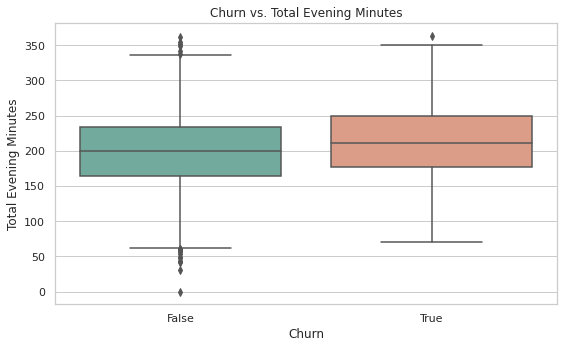

In [27]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total eve minutes', data=df, palette=['#69b3a2', '#e9967a'])
plt.title('Churn vs. Total Evening Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Evening Minutes')
plt.tight_layout()
plt.show()


### Interpretation: Churn vs Total Evening Minutes

This boxplot compares the distribution of total evening minutes for churned versus non-churned customers.

#### Key Observations

**Higher Usage Among Churners:**
- The median value for customers who churned is slightly higher than those who didn’t.
- This indicates that customers who churn may use evening minutes more.

**Spread and Outliers:**
- The churned group has a more compact IQR (interquartile range), suggesting slightly less variability within the middle 50%.
- Non-churned customers have a wider range, with a few high outliers beyond 300 minutes.

#### Interpretation

Evening usage alone doesn’t appear to be a strong indicator of churn but may still be a contributing factor.
- Higher usage could reflect customer reliance on service during evening hours, potentially increasing sensitivity to service quality or cost.

#### Business Implications

- Consider evaluating if evening heavy users are experiencing issues such as dropped calls or billing confusion.
- Offer incentives or tailored plans for high-evening users to improve satisfaction and reduce churn.


## 5.7 Churn vs Total Night Minutes

### Objective  
Investigate whether there is a significant difference in night call usage (in minutes) between customers who churned and those who remained subscribed.


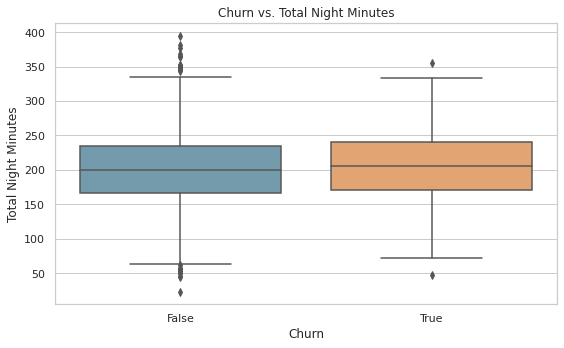

In [28]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total night minutes', data=df, palette=['#6a9fb5', '#f4a261'])
plt.title('Churn vs. Total Night Minutes')
plt.xlabel('Churn')
plt.ylabel('Total Night Minutes')
plt.tight_layout()
plt.show()


### Interpretation: Churn vs Total Night Minutes

This boxplot compares the distribution of total night minutes for churned and non-churned customers.

####  Key Observations

- **Similar Medians**: The median night minutes used is nearly identical for both groups, indicating that night-time usage does not strongly differentiate churn behavior.
- **Slightly Wider Spread for Non-Churners**: Non-churned customers show slightly more variation, but the overall distribution is quite similar across groups.
- **Fewer Outliers**: There are fewer extreme outliers, suggesting night usage is more consistent across users.

####  Interpretation

Night call usage does not appear to have a strong influence on churn. Both churned and non-churned customers tend to use similar amounts of night minutes.

####  Business Implications

- Resources may be better focused on other time periods (e.g., day or evening) where usage differences are more pronounced.
- However, it's still important to ensure quality night-time service, especially for users who rely on off-peak hours.


## 5.8 Churn vs Total International Minutes

###  Objective

Investigate whether customers who churned tend to spend more time on international calls compared to those who remain subscribed.


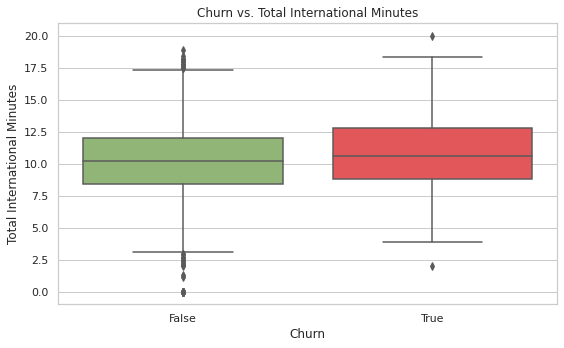

In [29]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.boxplot(x='churn', y='total intl minutes', data=df, palette=['#90be6d', '#f94144'])
plt.title('Churn vs. Total International Minutes')
plt.xlabel('Churn')
plt.ylabel('Total International Minutes')
plt.tight_layout()
plt.show()


## 5.8 Churn vs Total International Minutes

###  Interpretation: Churn vs Total International Minutes

This boxplot compares the distribution of international call minutes for churned versus non-churned customers.

---

###  Key Observations

- **Higher International Usage Among Churners**  
  The median international minutes for churned customers is visibly higher than that of non-churned customers.  
  This suggests that customers who make more international calls may be more likely to churn.

- **Outliers and Distribution**  
  Both churned and non-churned groups show a relatively tight interquartile range (IQR), but churned customers have more visible outliers above 20 minutes, which may reflect a smaller group of heavy users.

---

### Interpretation

Higher international usage may contribute to churn, possibly due to:

- Higher international call charges leading to customer dissatisfaction  
- Expectation mismatch in international call quality or costs  
- Lack of competitive international calling plans

---

### Business Implications

- Consider introducing or promoting international calling bundles for heavy users.
- Identify and proactively engage international callers with loyalty programs or feedback surveys.
- Monitor complaints or issues related to international calls as early churn signals.


## 5.9 Churn vs Customer Service Calls (Categorical)

###  Objective

Investigate the relationship between the number of customer service calls and churn, with a focus on understanding if increased customer service interactions correlate with higher churn rates.


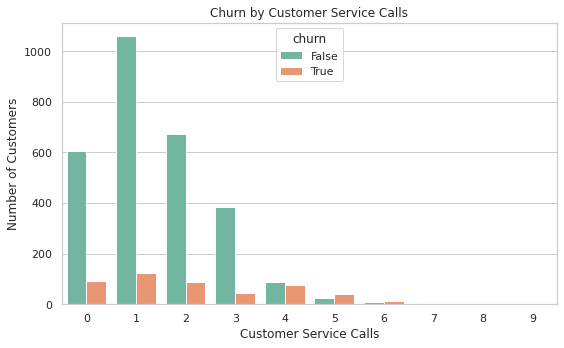

In [30]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='customer service calls', hue='churn', data=df, palette='Set2')
plt.title('Churn by Customer Service Calls')
plt.xlabel('Customer Service Calls')
plt.ylabel('Number of Customers')
plt.tight_layout()
plt.show()

### Interpretation: Churn vs Customer Service Calls (Categorical)

This count plot visualizes the number of customer service calls made by customers and how it relates to churn.

####  Key Observations

- **Higher Churn with More Calls**:  
  Customers who made 4 or more customer service calls are significantly more likely to churn.

- **Majority Didn't Call Much**:  
  Most customers, both churned and non-churned, made fewer than 3 calls.

- **Churn Rate Spikes After 3 Calls**:  
  The churn rate sharply increases for customers who contacted customer service frequently.

####  Interpretation

Frequent interactions with customer service may indicate dissatisfaction or unresolved issues. This group is at higher risk of leaving.

####  Business Implications

- Identify and flag customers who call 3+ times as **churn risks**.
- Implement a **priority resolution system** for repeat callers to enhance satisfaction.
- Regularly audit **customer service effectiveness** to reduce churn triggers.


## 5.10 Churn vs International Plan

###  Objective

Examine whether having an international calling plan affects the likelihood of churn. This analysis seeks to determine if customers with international plans are more likely to leave than those without.


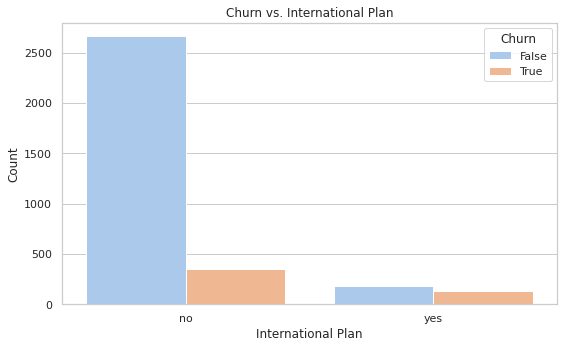

In [31]:
# Set style
sns.set(style="whitegrid")

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(x='international plan', hue='churn', data=df, palette='pastel')
plt.title('Churn vs. International Plan')
plt.xlabel('International Plan')
plt.ylabel('Count')
plt.legend(title='Churn')
plt.tight_layout()
plt.show()